In [1]:
from pylab import *

In [24]:
def cond_ini_dona(x,y):
    Nx , Ny = len(x) , len(y)
    psi_ini = zeros((Ny,Nx))
    for i in range(Nx):
        for j in range(Ny):
            if 0.4 <= sqrt(x[i]**2 + y[j]**2) <= 0.8:
                psi_ini[j,i] = 1.0
    return psi_ini

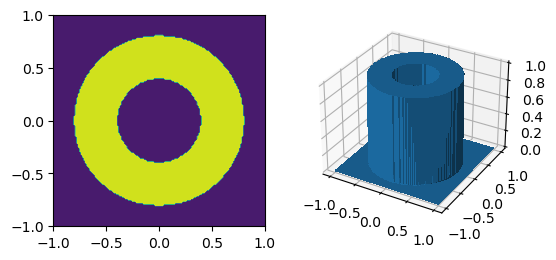

In [33]:
x , y = linspace(-1,1,150) , linspace(-1,1,150)
XX,YY = meshgrid(x,y)
psi_ini = cond_ini_dona(x,y)

figura = figure(dpi=100)
ejes = figura.add_subplot(1,2,1)
ejes.set_aspect('equal')
contourf(XX,YY,psi_ini)
ejes = figura.add_subplot(1,2,2,projection='3d')
ejes.plot_surface(XX,YY,psi_ini,rstride=1,
                  cstride=1,lw=0,antialiased=False)

show()

In [65]:
def AiB_2D(Nx_in,Ny_in,r):
    # dim no considera los puntos a la frontera
    A , B = zeros((Nx_in*Ny_in,Nx_in*Ny_in)) , zeros((Nx_in*Ny_in,Nx_in*Ny_in))
    for i in range(Nx_in):
        for j in range(Ny_in):
            A[i*Ny_in+j,i*Ny_in+j] = 1+4*r
            B[i*Ny_in+j,i*Ny_in+j] = 1-4*r
    # Diagonal superior en j
    for i in range(Nx_in):
        for j in range(Ny_in-1):
            A[i*Ny_in+j+1,i*Ny_in+j] = -r
            A[i*Ny_in+j,i*Ny_in+j+1] = -r
            B[i*Ny_in+j+1,i*Ny_in+j] = r
            B[i*Ny_in+j,i*Ny_in+j+1] = r
    # Diagonal superior en i
    for i in range(Nx_in-1):
        for j in range(Ny_in):
            A[(i+1)*Ny_in+j,i*Ny_in+j] = -r
            A[i*Ny_in+j,(i+1)*Ny_in+j] = -r
            B[(i+1)*Ny_in+j,i*Ny_in+j] = r
            B[i*Ny_in+j,(i+1)*Ny_in+j] = r
    Ai = inv(A)
    return dot(Ai,B)

In [85]:
def CR_2D(psi_ini,x,y,t,D):
    dx , dy , dt = x[1]-x[0] , y[1]-y[0] , t[1]-t[0]
    r = (D*dt)/(2*dx*dy)
    sol_xy_t = zeros( (len(y),len(x),len(t)) )
    print('r = ',r)
    sol_xy_t[:,:,0] = psi_ini
    E = AiB_2D(len(x)-2,len(y)-2,r)
    psi_in = psi_ini[1:-1,1:-1]
    psi_in = reshape(psi_in, (len(x)-2)*(len(y)-2) )
    for ti in range(len(t)-1):
        psi_in = dot(E,psi_in)
        sol_xy_t[1:-1,1:-1,ti+1] = reshape(psi_in,(len(y)-2,len(x)-2))
    return sol_xy_t

In [96]:
x , y , t = linspace(-1,1,100) , linspace(-1,1,100) , linspace(0,0.1,50)
psi_ini = cond_ini_dona(x,y)

In [97]:
solucion = CR_2D(psi_ini,x,y,t,0.1)

r =  0.2500255102040812


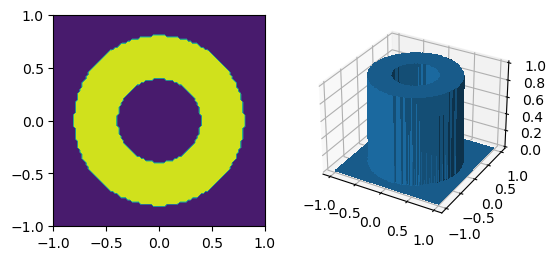

In [99]:
XX,YY = meshgrid(x,y)

figura = figure(dpi=100)
ejes = figura.add_subplot(1,2,1)
ejes.set_aspect('equal')
contourf(XX,YY,solucion[:,:,0])
ejes = figura.add_subplot(1,2,2,projection='3d')
ejes.plot_surface(XX,YY,solucion[:,:,0],rstride=1,
                  cstride=1,lw=0,antialiased=False)
show()

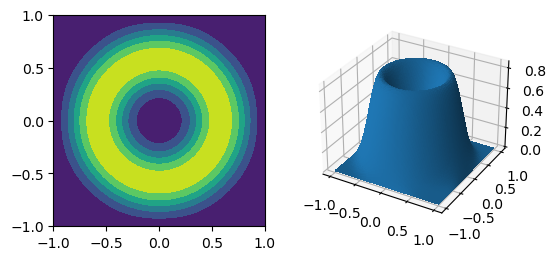

In [100]:
figura = figure(dpi=100)
ejes = figura.add_subplot(1,2,1)
ejes.set_aspect('equal')
contourf(XX,YY,solucion[:,:,-1])
ejes = figura.add_subplot(1,2,2,projection='3d')
ejes.plot_surface(XX,YY,solucion[:,:,-1],rstride=1,
                  cstride=1,lw=0,antialiased=False)

show()